In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.stats import jackknife_stats

%load_ext autoreload
%autoreload 2
import plotter
import plot_comparison as pc
import utils

In [2]:
def covariance(xis):
    xis = np.array(xis)
    N = xis.shape[0]
    Nb = xis.shape[1]
    means = np.mean(xis, axis=0)
    fac = 1.0/(float(N)-1.0)
    covmat = np.zeros((Nb, Nb))
    for i in range(Nb):
        for j in range(Nb):
            covsum = 0
            for n in range(N):
                covsum += (xis[n][i]-means[i])*(xis[n][j]-means[j])
            covmat[i][j] = fac * covsum
    return covmat

In [3]:
# aka Correlation Matrix
def reduced_covariance(covmat):
    covmat = np.array(covmat)
    Nb = covmat.shape[0]
    reduced = np.zeros_like(covmat)
    for i in range(Nb):
        ci = covmat[i][i]
        for j in range(Nb):
            cj = covmat[j][j]
            reduced[i][j] = covmat[i][j]/np.sqrt(ci*cj)
    return reduced

In [4]:
# The prefactor unbiases the inverse; see e.g. Pearson 2016
def inverse_covariance(covmat, N):
    inv = np.linalg.inv(covmat)
    Nb = covmat.shape[0]
    prefac = float(N - Nb - 2)/float(N - 1)
    return prefac * inv

In [5]:
boxsize = 750
nbar_str = '1e-5'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 8
seeds = range(N)

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

In [8]:
rs_stan = []
xis_stan = []
for i in range(len(seeds)):
    tag = cat_tag+'_seed{}'.format(seeds[i])
    r_stan_lin, xi_stan_lin, label_stan = np.load('{}/cf_lin_{}{}.npy'.format(result_dir, 'standard', tag), allow_pickle=True, encoding='latin1')
    rs_stan.append(r_stan_lin)
    xis_stan.append(xi_stan_lin)
rs_stan = np.array(rs_stan)
xis_stan = np.array(xis_stan)


In [9]:
proj = 'tophat'
rs = []
xis = []
amps = []
for i in range(len(seeds)):
    tag = cat_tag+'_seed{}'.format(seeds[i])
    r, xi, amp, proj = np.load('{}/cf_lin_{}{}.npy'.format(result_dir, proj, tag), allow_pickle=True, encoding='latin1')
    rs.append(r)
    xis.append(xi)
    amps.append(amp)
rs = np.array(rs)
xis = np.array(xis)
amps = np.array(amps)

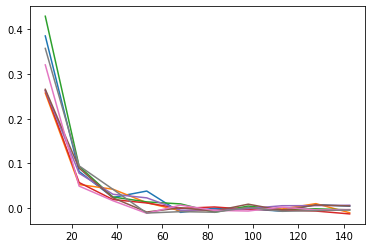

In [10]:
for i in range(len(seeds)):
    plt.plot(rs_stan[i], xis_stan[i])

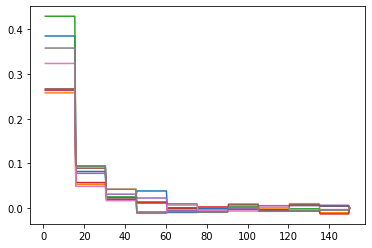

In [11]:
for i in range(len(seeds)):
    plt.plot(rs[i], xis[i])

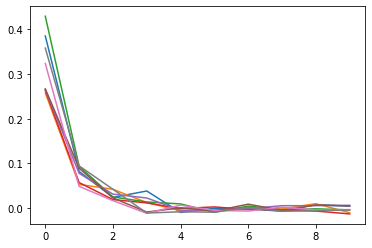

In [12]:
for i in range(len(seeds)):
    plt.plot(amps[i])

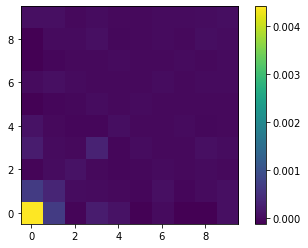

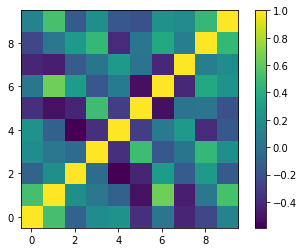

In [13]:
cov_stan = covariance(xis_stan)
red_stan = reduced_covariance(cov_stan)

plt.figure()
plt.imshow(cov_stan, origin='lower')
plt.colorbar()

plt.figure()
plt.imshow(red_stan, origin='lower')
plt.colorbar()

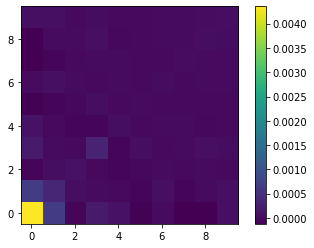

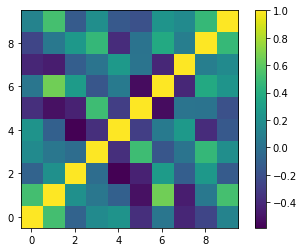

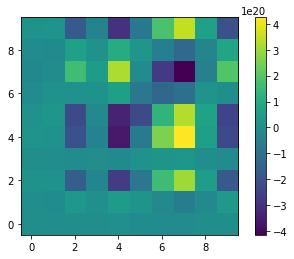

In [14]:
cov = covariance(amps)
red = reduced_covariance(cov)
inv = inverse_covariance(cov, N)

plt.figure()
plt.imshow(cov, origin='lower')
plt.colorbar()

plt.figure()
plt.imshow(red, origin='lower')
plt.colorbar()

plt.figure()
plt.imshow(inv, origin='lower')
plt.colorbar()

plotting


TypeError: 'NoneType' object is not subscriptable

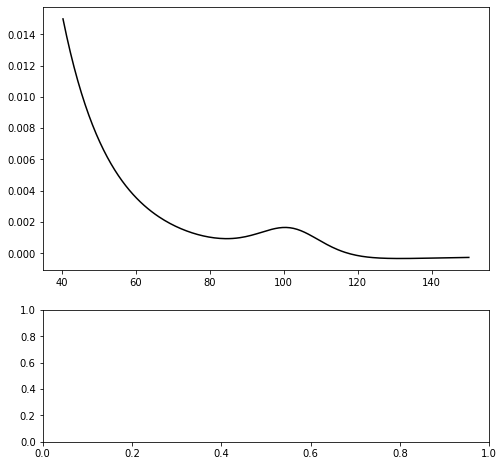

In [15]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_tophat'

#proj_tags = ['quadratic']
proj_tags = ['tophat']
ax = pc.plot_lognormal_multi(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)
ax[1].set_ylim(-2,2)

In [ ]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_tophat'

#proj_tags = ['quadratic']
proj_tags = ['tophat']
ax = pc.plot_lognormal_error(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)
ax[1].set_ylim(-2,2)

plotting


(-2, 2)

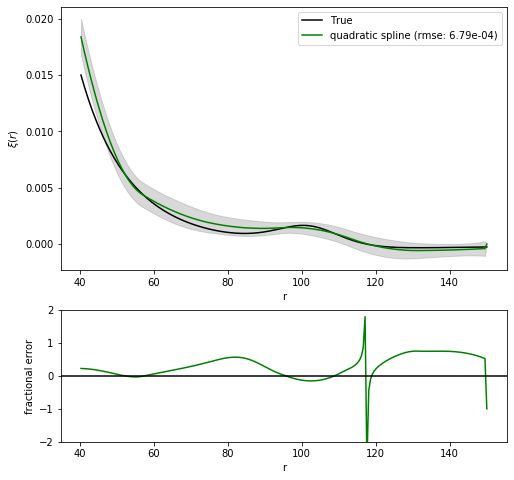

In [16]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_quadratic_n10'

#proj_tags = ['quadratic']
proj_tags = ['quadratic_n10']
ax = pc.plot_lognormal_error(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)
ax[1].set_ylim(-2,2)

In [1]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
plot_tag = '_quadratic_n10'

#proj_tags = ['quadratic']
proj_tags = ['quadratic_n10']
ax = pc.plot_lognormal_error(tag, cat_tag, proj_tags, plot_tag=plot_tag, nrealizations=10)
ax[1].set_ylim(-2,2)

NameError: name 'pc' is not defined

In [18]:
boxsize = 750
nbar_str = '1e-5'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 8
seeds = range(N)

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

In [19]:
proj = 'quadratic_n10'
rs = []
xis = []
amps = []
for i in range(len(seeds)):
    tag = cat_tag+'_seed{}'.format(seeds[i])
    r, xi, amp, proj = np.load('{}/cf_lin_{}{}.npy'.format(result_dir, proj, tag), allow_pickle=True, encoding='latin1')
    rs.append(r)
    xis.append(xi)
    amps.append(amp)
rs = np.array(rs)
xis = np.array(xis)
amps = np.array(amps)

ValueError: not enough values to unpack (expected 4, got 3)

## Comparing bins

In [8]:
def bin_average(r, x, a, b):
    xint = [x[i] for i in range(len(r)) if r[i]<b and r[i]>=a]
    rint = [r[i] for i in range(len(r)) if r[i]<b and r[i]>=a]
    return rint, np.mean(xint)

In [9]:
boxsize = 750
nbar_str = '1e-5'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 8
seeds = range(N)

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

In [13]:
rtrue, xitrue, _ = np.load('{}/cf_lin_true{}.npy'.format(cat_dir, cat_tag), allow_pickle=True)
xmin = 40
xitrue = np.array([xitrue[k] for k in range(len(rtrue)) if rtrue[k]>xmin])
rtrue = np.array([rtrue[k] for k in range(len(rtrue)) if rtrue[k]>xmin])

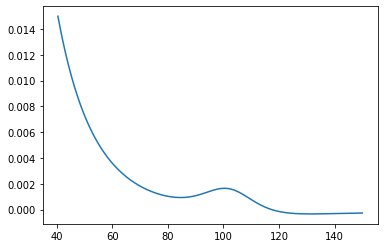

In [14]:
plt.plot(rtrue, xitrue)

In [15]:
rmin = 1
rmax = 150
nbins = 10
rbins = np.linspace(rmin, rmax, nbins+1)
rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

In [16]:
rtrue_binned = []
xitrue_binned = []
for i in range(len(rbins)-1):
    a = rbins[i]
    b = rbins[i+1]
    rint, xiavg = bin_average(rtrue, xitrue, a, b)
    if xiavg:
        for r in rint:
            rtrue_binned.append(r)
            xitrue_binned.append(xiavg)

/home/users/ksf293/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
len(xitrue_binned)

220

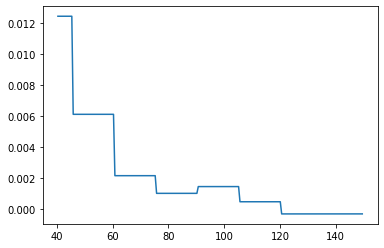

In [18]:
plt.plot(rtrue_binned, xitrue_binned)

In [19]:
proj = 'tophat'
rs = []
xis = []
amps = []
for i in range(len(seeds)):
    tag = cat_tag+'_seed{}'.format(seeds[i])
    r, xi, amp, proj = np.load('{}/cf_lin_{}{}.npy'.format(result_dir, proj, tag), allow_pickle=True, encoding='latin1')
    rs.append(r)
    xis.append(xi)
    amps.append(amp)
rs = np.array(rs)
xis = np.array(xis)
amps = np.array(amps)
xis_mean = np.mean(xis, axis=0)
xis_std = np.std(xis, axis=0)
rs_mean = np.mean(xis, axis=0)
print(xis.shape)
print(xis_mean.shape)

(8, 300)
(300,)


In [30]:
proj = 'quadratic_n10'
rs = []
xis = []
amps = []
for i in range(len(seeds)):
    tag = cat_tag+'_seed{}'.format(seeds[i])
    fn = '{}/cf_lin_{}{}.npy'.format(result_dir, proj, tag)
    r, xi, label = np.load(fn, allow_pickle=True)
    rs.append(r)
    xis.append(xi)
    amps.append(amp)
rs = np.array(rs)
xis = np.array(xis)
amps = np.array(amps)
r0 = rs[0]
xisq_mean = np.mean(xis, axis=0)
xisq_std = np.std(xis, axis=0)

In [42]:
rqs_binned = []
xisq_binned = []
for xi in xis:
    xisq = []
    rqs = []
    for i in range(len(rbins)-1):
        a = rbins[i]
        b = rbins[i+1]
        rint, xiavg = bin_average(r0, xi, a, b)
        if xiavg:
            for r in rint:
                rqs.append(r)
                xisq.append(xiavg)
                
    print(len(xisq))
    xisq_binned.append(xisq)
    rqs_binned.append(rqs)

xisq_binned = np.array(xisq_binned)
xisq_binned_mean = np.mean(xisq_binned, axis=0)
xisq_binned_std = np.mean(xisq_binned, axis=0)
print(xisq_binned.shape)
print(xisq_binned_mean.shape)

299
299
299
299
299
299
299
299
(8, 299)
(299,)


In [46]:
rq_binned = []
xiq_binned = []
for i in range(len(rbins)-1):
    a = rbins[i]
    b = rbins[i+1]
    rint, xiavg = bin_average(r0, xisq_mean, a, b)
    if xiavg:
        for r in rint:
            rq_binned.append(r)
            xiq_binned.append(xiavg)
print(len(rq_binned))
print(len(xiq_binned))

299
299


(-0.01, 0.05)

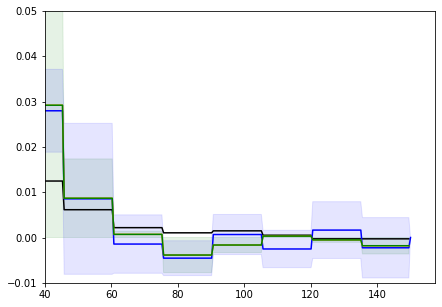

In [51]:
plt.figure(figsize=(7,5))
plt.plot(rtrue_binned, xitrue_binned, color='black')
plt.plot(r0, xis_mean, color='blue')
plt.plot(rqs_binned[0], xisq_binned_mean, color='orange')
plt.plot(rq_binned, xiq_binned, color='green')

plt.fill_between(rqs_binned[0], xisq_binned_mean-xisq_binned_std, xisq_binned_mean+xisq_binned_std, color='green', alpha=0.1)
plt.fill_between(r0, xis_mean-xis_std, xis_mean+xis_std, color='blue', alpha=0.1)
plt.xlim(40)
plt.ylim(-0.01, 0.05)

### Ok nicer now:

In [6]:
def load_cfs(result_dir, proj, seeds):
    rs = []
    xis = []
    amps = []
    for i in range(len(seeds)):
        tag = cat_tag+'_seed{}'.format(seeds[i])
        r, xi, amp, _ = np.load('{}/cf_lin_{}{}.npy'.format(result_dir, proj, tag), allow_pickle=True, encoding='latin1')
        rs.append(r)
        xis.append(xi)
        amps.append(amp)
    rs = np.array(rs)
    xis = np.array(xis)
    amps = np.array(amps)
    return rs, xis, amps

In [7]:
def chi2(x1, x2, std=None):
    assert len(x1)==len(x2), "x1 must have same length as x2"
#     var = std**2
#     cov = np.diag(var)
#     icov = np.linalg.inv(cov)
#     diff = x1-x2
#     chi2 = np.matmul(diff.T, np.matmul(icov, diff))
    chi2 = sum((x1-x2)**2/std**2)
    dof = len(x1)
    return chi2, dof

In [8]:
def bin_average(r, x, a, b):
    xint = [x[i] for i in range(len(r)) if r[i]<b and r[i]>=a]
    rint = [r[i] for i in range(len(r)) if r[i]<b and r[i]>=a]
    return rint, np.mean(xint)

In [9]:
def bin_cf_single(r, xi, rbins):
    xis_binned = []
    rs_binned = []
    r_avg = []
    xi_avg = []
    for i in range(len(rbins)-1):
        a = rbins[i]
        b = rbins[i+1]
        rbin, xibin = bin_average(r, xi, a, b)
        r_avg.append(np.mean(rbin))
        xi_avg.append(xibin)
        if xibin:
            for rval in rbin:
                rs_binned.append(rval)
                xis_binned.append(xibin)
    return rs_binned, xis_binned, r_avg, xi_avg

def bin_cfs(rs, xis, rbins):

    rs_binned_all = []
    xis_binned_all = []
    rs_avg_all = []
    xis_avg_all = []
    for i in range(len(xis)):
        r = rs[i]
        xi = xis[i]
        rs_binned, xis_binned, r_avg, xi_avg = bin_cf_single(r, xi, rbins)
        
        xis_binned_all.append(xis_binned)
        rs_binned_all.append(rs_binned)
        rs_avg_all.append(r_avg)
        xis_avg_all.append(xi_avg)

    return np.array(rs_binned_all), np.array(xis_binned_all), np.array(rs_avg_all), np.array(xis_avg_all)

In [10]:
def get_mean_stats(rs, xis):
    rs_mean = np.mean(rs, axis=0)
    xis_mean = np.mean(xis, axis=0)
    xis_std = np.std(xis, axis=0)
    xis_low = xis_mean - xis_std 
    xis_high = xis_mean + xis_std 
    return rs_mean, xis_mean, xis_std, xis_low, xis_high

In [11]:
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [12]:
def compare_projections(projs, cat_dir, cat_tag, result_dir, rbins, seeds):
    r_true, xi_true, _ = np.load('{}/cf_lin_true{}.npy'.format(cat_dir, cat_tag), allow_pickle=True)
    r_true_binned, xi_true_binned, r_true_avg, xi_true_avg = bin_cf_single(r_true, xi_true, rbins)

    plt.figure()
    fig, ax = plt.subplots(3, 1, figsize=(8,18))

    ax[0].plot(r_true, xi_true, color='black', lw=2)
    ax[1].plot(r_true_binned, xi_true_binned, color='black', lw=2)
    ax[2].scatter(r_true_avg, xi_true_avg, color='black', lw=2)

    offset = 0
    for proj in projs:
        print(proj)
        rs, xis, amps = load_cfs(result_dir, proj, seeds)
        rs_binned, xis_binned, rs_avg, xis_avg = bin_cfs(rs, xis, rbins)
        rs_mean, xis_mean, xis_std, xis_low, xis_high = get_mean_stats(rs, xis)

        rs_binned_mean, xis_binned_mean, xis_binned_std, xis_binned_low, xis_binned_high = get_mean_stats(rs_binned, xis_binned)
        rs_avg_mean, xis_avg_mean, xis_avg_std, _, _ = get_mean_stats(rs_avg, xis_avg)

        ax[0].plot(rs_mean, xis_mean, color=utils.get_color(proj))
        ax[0].fill_between(rs_mean, xis_low, xis_high, color=utils.get_color(proj), alpha=0.1)
        
        
        ax[1].plot(rs_binned_mean, xis_binned_mean, color=utils.get_color(proj))
        ax[1].fill_between(rs_binned_mean, xis_binned_low, xis_binned_high, color=utils.get_color(proj), alpha=0.1)

        #chisq, dof = chi2(xis_avg_mean, xi_true_avg, std=xis_avg_std)
        #label = r'{}, $\chi^2$/dof: {:.3f}/{}'.format(proj, chisq, dof)
        rmserr = rmse(xis_avg_mean, xi_true_avg)
        label = r'{}, RMSE = {:3f}'.format(proj, rmserr)
        ax[2].errorbar(rs_avg_mean+offset, xis_avg_mean, yerr=xis_avg_std, color=utils.get_color(proj), 
                       marker='d', ls='None', label=label)
        offset += 0.5

    for i in range(len(ax)):
        ax[i].set_xlim(min(rbins), max(rbins))
        ax[i].set_ylim(-0.005, 0.02)
        ax[i].legend()
        ax[i].set_xlabel(r's (Mpc h$^{-1}$)')
        ax[i].set_ylabel(r'$\xi$(s)')

In [13]:
def compare_projections_rms(projs, cat_dir, cat_tag, result_dir, rbins, seeds):
    xmin = rbins[0]
    xmax = rbins[-1]
    
    r_true, xi_true, _ = np.load('{}/cf_lin_true{}.npy'.format(cat_dir, cat_tag), allow_pickle=True)
    r_true_binned, xi_true_binned, r_true_avg, xi_true_avg = bin_cf_single(r_true, xi_true, rbins)

    rs_mean = [None]*len(projs)
    xis_mean = [None]*len(projs)
    rs_binned_mean = [None]*len(projs)
    xis_binned_mean = [None]*len(projs)    
    rs_avg_mean = [None]*len(projs)
    xis_avg_mean = [None]*len(projs)

    labels = [None]*len(projs)
    colors = [None]*len(projs)

    error_regions = []
    error_regions_binned = []
    error_regions_avg = []

    #labels = []
    
    offset = 0
    for i in range(len(projs)):
        proj = projs[i]
        print(proj)
        rs, xis, amps = load_cfs(result_dir, proj, seeds)
        rs_binned, xis_binned, rs_avg, xis_avg = bin_cfs(rs, xis, rbins)
        rs_mean[i], xis_mean[i], xis_std, xis_low, xis_high = get_mean_stats(rs, xis)

        rs_binned_mean[i], xis_binned_mean[i], xis_binned_std, xis_binned_low, xis_binned_high = get_mean_stats(rs_binned, xis_binned)
        rs_avg_mean[i], xis_avg_mean[i], xis_avg_std, xis_avg_low, xis_avg_high = get_mean_stats(rs_avg, xis_avg)

        error_regions.append([xis_low, xis_high])
        error_regions_binned.append([xis_binned_low, xis_binned_high])
        error_regions_avg.append([xis_avg_low, xis_avg_high])

        #rmserr = rmse(xis_avg_mean, xi_true_avg)
        #labels[i] = r'{}, RMSE = {:3f}'.format(proj, rmserr)
        labels[i] = proj
        colors[i] = utils.get_color(proj)

    plotter.plot_cf_cont(rs_mean, xis_mean, r_true, xi_true, labels, colors, 
                         log=False, err=True, error_regions=error_regions, xlim=[xmin, xmax])  
    plotter.plot_cf_cont(rs_binned_mean, xis_binned_mean, r_true_binned, xi_true_binned, labels, colors, 
                         log=False, err=True, error_regions=error_regions_binned, xlim=[xmin, xmax])  
    plotter.plot_cf_cont(rs_avg_mean, xis_avg_mean, r_true_avg, xi_true_avg, labels, colors, 
                         log=False, err=True, error_regions=error_regions_avg, xlim=[xmin, xmax], cont=False)  

tophat_n22
quadratic_n22
plotting
plotting
plotting


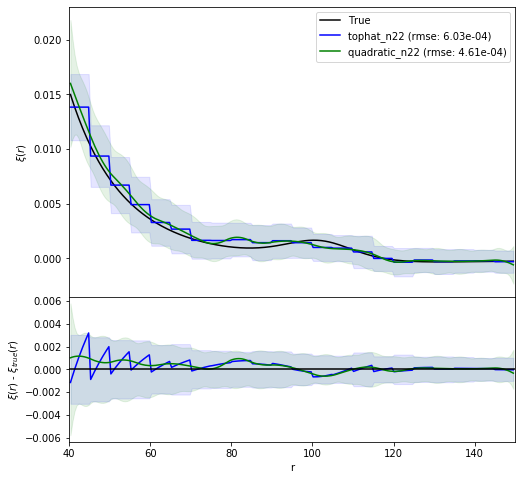

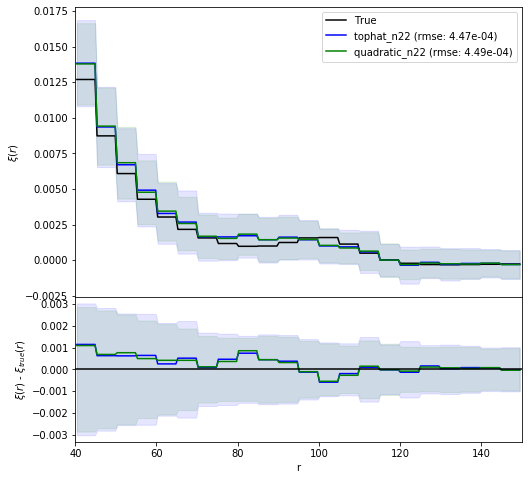

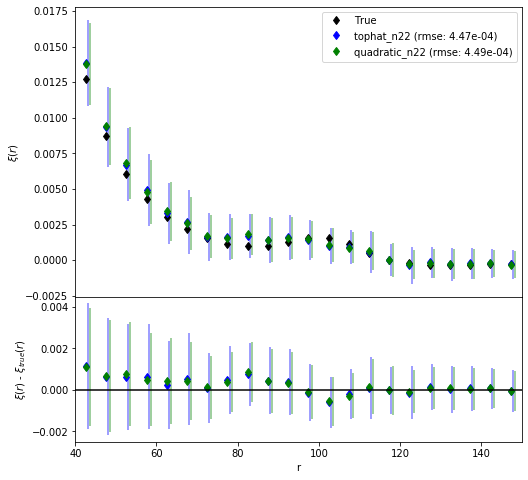

In [14]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n22', 'quadratic_n22']

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)
#rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

compare_projections_rms(projs, cat_dir, cat_tag, result_dir, rbins, seeds)

tophat_n22
quadratic_n11
plotting
plotting
plotting


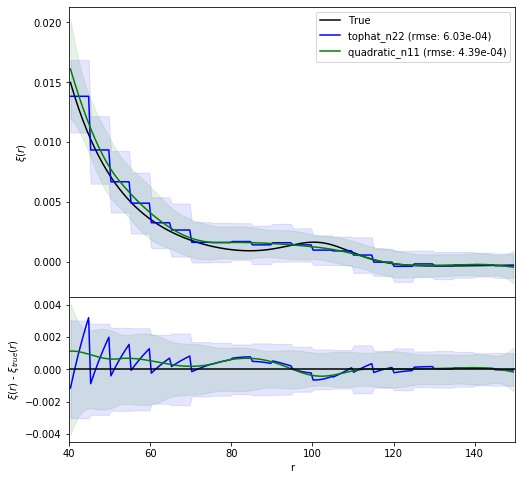

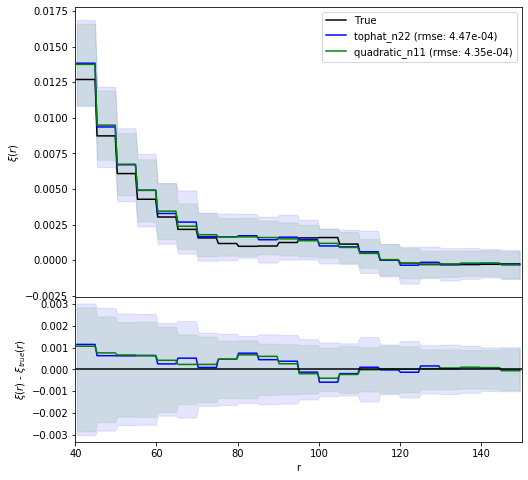

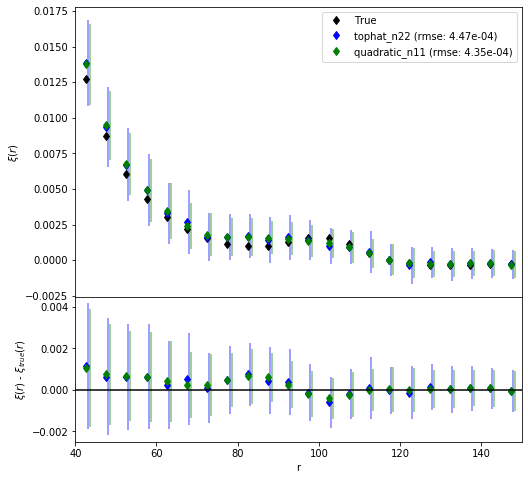

In [15]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n22', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)
#rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

compare_projections_rms(projs, cat_dir, cat_tag, result_dir, rbins, seeds)

tophat_n11
quadratic_n11
plotting
plotting
plotting


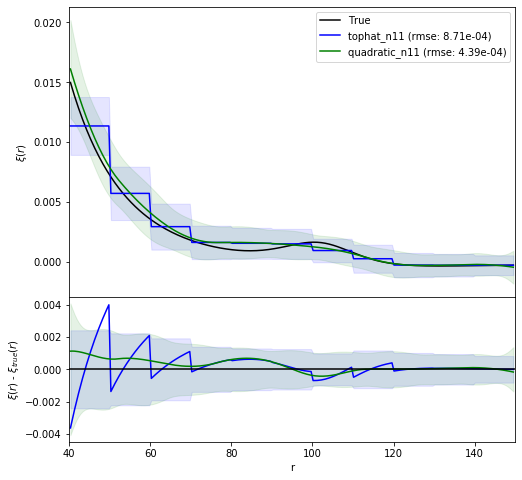

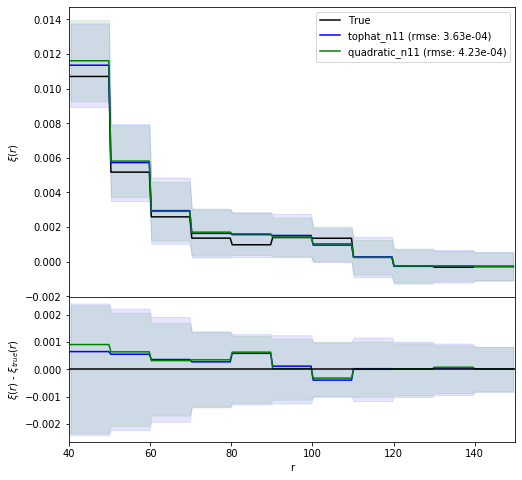

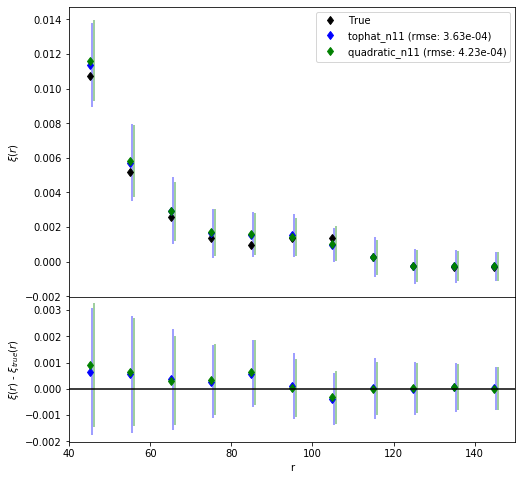

In [16]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n11', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 11
rbins = np.linspace(rmin, rmax, nbins+1)
#rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

compare_projections_rms(projs, cat_dir, cat_tag, result_dir, rbins, seeds)

tophat_n44
quadratic_n11
plotting
plotting
plotting


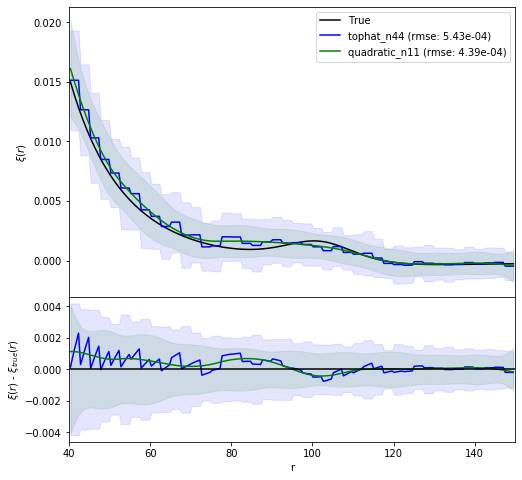

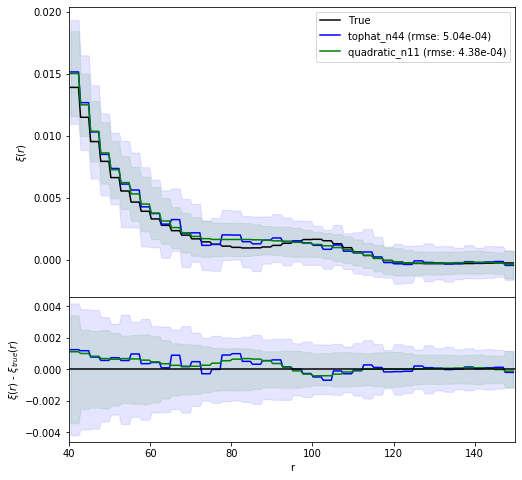

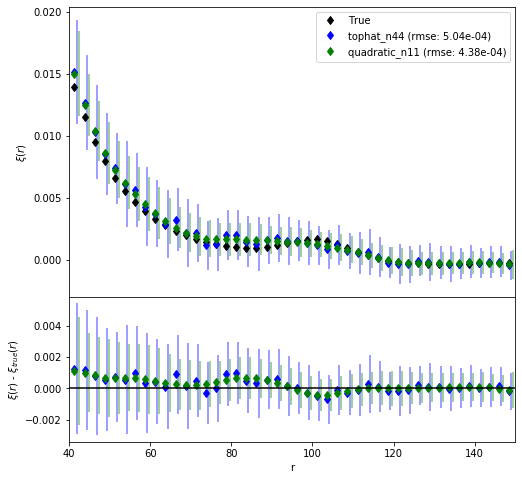

In [17]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n44', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 44
rbins = np.linspace(rmin, rmax, nbins+1)
#rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

compare_projections_rms(projs, cat_dir, cat_tag, result_dir, rbins, seeds)

In [18]:
def compare_sets_rms(projs, cat_dir, cat_tag, result_dir, rbins, seed_sets):
    xmin = rbins[0]
    xmax = rbins[-1]
    
    r_true, xi_true, _ = np.load('{}/cf_lin_true{}.npy'.format(cat_dir, cat_tag), allow_pickle=True)
    r_true_binned, xi_true_binned, r_true_avg, xi_true_avg = bin_cf_single(r_true, xi_true, rbins)

    rs_set_mean = [None]*len(projs)
    xis_set_mean = [None]*len(projs)
    rs_set_binned_mean = [None]*len(projs)
    xis_set_binned_mean = [None]*len(projs)    
    rs_set_avg_mean = [None]*len(projs)
    xis_set_avg_mean = [None]*len(projs)

    labels = [None]*len(projs)
    colors = [None]*len(projs)

    error_regions = []
    error_regions_binned = []
    error_regions_avg = []

    for i in range(len(projs)):
        proj = projs[i]
        print(proj)
        
        rs_set = []
        xis_set = []

        rs_set_binned = []
        xis_set_binned = []

        rs_set_avg = []
        xis_set_avg = []

        count = 0
        for seeds in seed_sets:
            #print(count)
            rs, xis, amps = load_cfs(result_dir, proj, seeds)
            rs_binned, xis_binned, rs_avg, xis_avg = bin_cfs(rs, xis, rbins)
            rs_mean, xis_mean, xis_std, xis_low, xis_high = get_mean_stats(rs, xis)
            rs_binned_mean, xis_binned_mean, xis_binned_std, xis_binned_low, xis_binned_high = get_mean_stats(rs_binned, xis_binned)
            rs_avg_mean, xis_avg_mean, xis_avg_std, _, _ = get_mean_stats(rs_avg, xis_avg)

            rs_set.append(rs_mean)
            xis_set.append(xis_mean)

            rs_set_binned.append(rs_binned_mean)
            xis_set_binned.append(xis_binned_mean)

            rs_set_avg.append(rs_avg_mean)
            xis_set_avg.append(xis_avg_mean)
            count += 1
            
        rs_set_mean[i], xis_set_mean[i], xis_set_std, xis_set_low, xis_set_high = get_mean_stats(rs_set, xis_set)
        
        rs_set_binned_mean[i], xis_set_binned_mean[i], xis_set_binned_std, \
            xis_set_binned_low, xis_set_binned_high = get_mean_stats(rs_set_binned, xis_set_binned)

        rs_set_avg_mean[i], xis_set_avg_mean[i], xis_set_avg_std, \
            xis_set_avg_low, xis_set_avg_high = get_mean_stats(rs_set_avg, xis_set_avg)

        error_regions.append([xis_set_low, xis_set_high])
        error_regions_binned.append([xis_set_binned_low, xis_set_binned_high])
        error_regions_avg.append([xis_set_avg_low, xis_set_avg_high])
        
        labels[i] = proj
        colors[i] = utils.get_color(proj)
        
    plotter.plot_cf_cont(rs_set_mean, xis_set_mean, r_true, xi_true, labels, colors, 
                         log=False, err=True, error_regions=error_regions, xlim=[xmin, xmax])  
    plotter.plot_cf_cont(rs_set_binned_mean, xis_set_binned_mean, r_true_binned, xi_true_binned, labels, colors, 
                         log=False, err=True, error_regions=error_regions_binned, xlim=[xmin, xmax])  
    plotter.plot_cf_cont(rs_set_avg_mean, xis_set_avg_mean, r_true_avg, xi_true_avg, labels, colors, 
                         log=False, err=True, error_regions=error_regions_avg, xlim=[xmin, xmax], cont=False) 

In [19]:
def jackknife_sample(samples):
    print("Jackknifing")
    samples = list(samples)
    sets = [None]*len(samples)
    for i in range(len(samples)):
        samples_copy = samples.copy()
        samples_copy.pop(i)
        sets[i] = samples_copy
    print("Jackknifed")
    return sets

tophat_n22
quadratic_n11
plotting
plotting
plotting


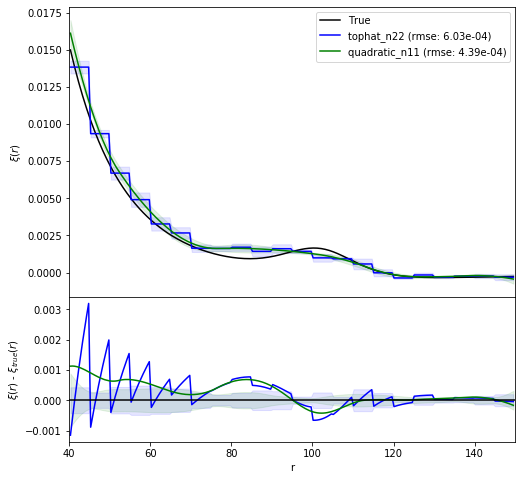

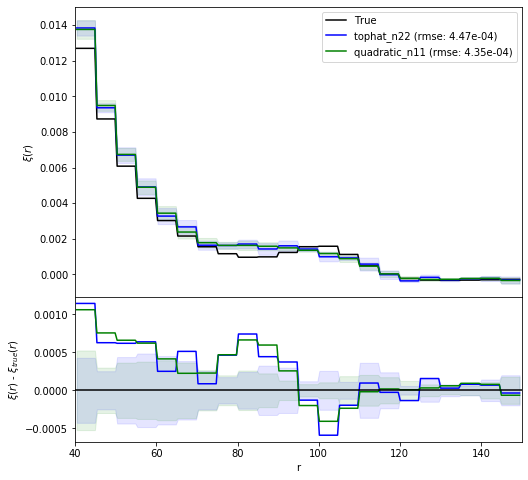

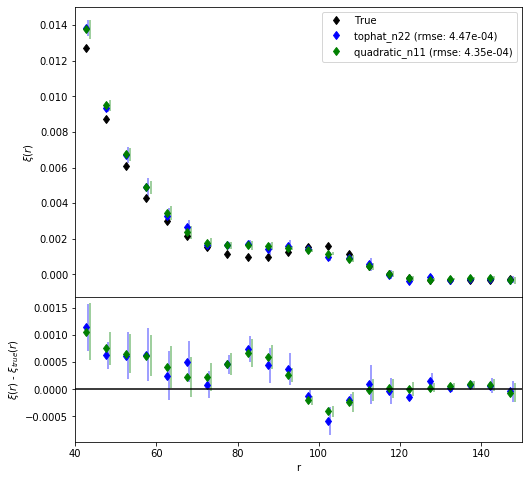

In [20]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
#seed_sets = [range(0,4), range(4,8)]
#seed_sets = [range(0,50), range(50,100)]
#seed_sets = jackknife_sample(range(N))
seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n22', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)

compare_sets_rms(projs, cat_dir, cat_tag, result_dir, rbins, seed_sets)

tophat_n44
quadratic_n11
plotting
plotting
plotting


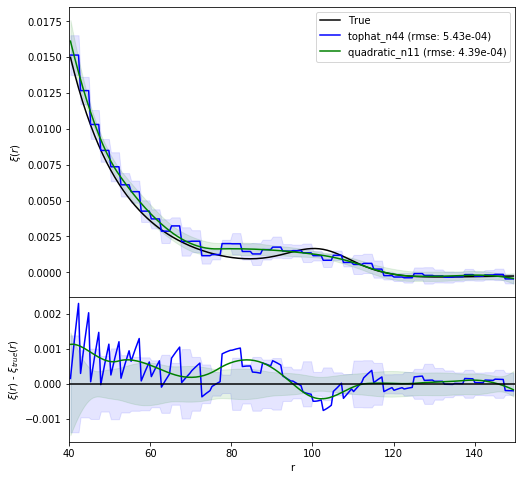

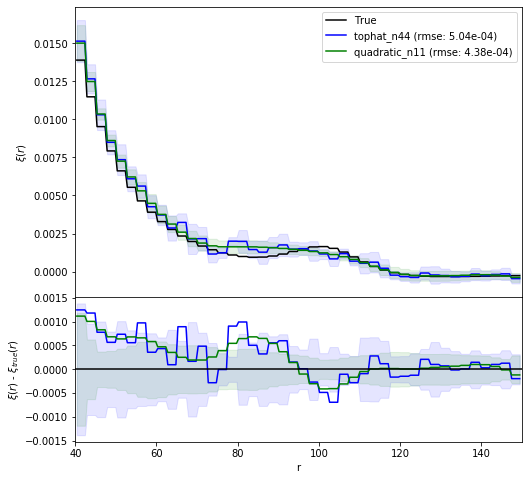

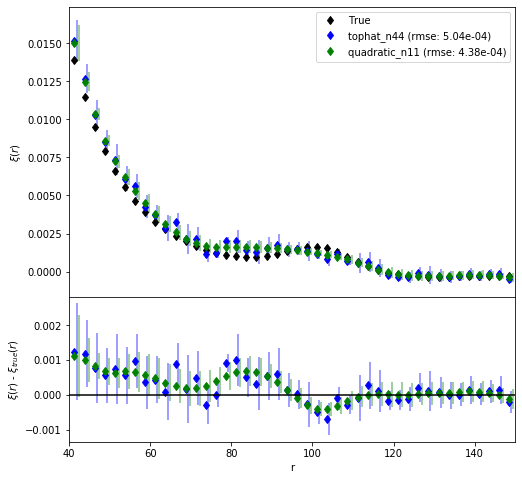

In [21]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
#seed_sets = [range(0,4), range(4,8)]
#seed_sets = [range(0,50), range(50,100)]
#seed_sets = jackknife_sample(range(N))
#seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]
seed_sets = []
nsets = 10
nseeds = int(N/nsets)
for i in range(nsets):
    start = int(i*nsets)
    sset = range(start, start+nseeds)
    seed_sets.append(sset)

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n44', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 44
rbins = np.linspace(rmin, rmax, nbins+1)

compare_sets_rms(projs, cat_dir, cat_tag, result_dir, rbins, seed_sets)

Jackknifing
Jackknifed
tophat_n44
quadratic_n11
plotting
plotting
plotting


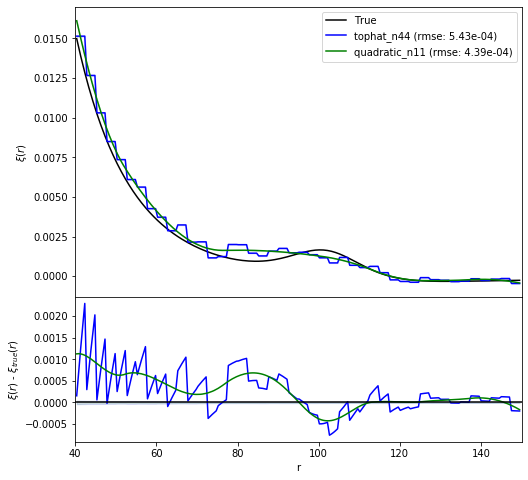

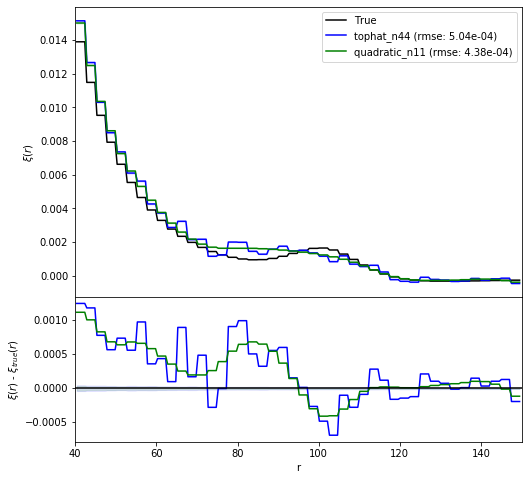

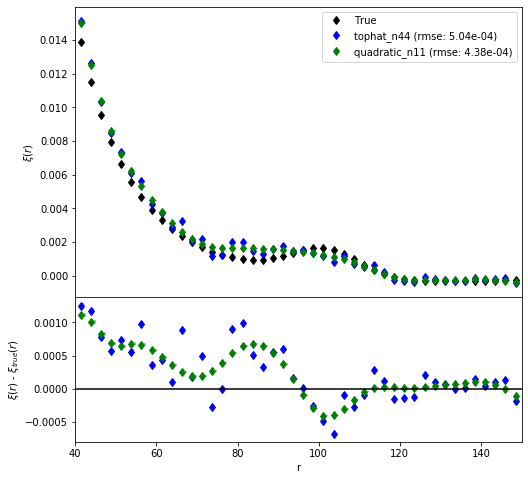

In [22]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
#seed_sets = [range(0,4), range(4,8)]
#seed_sets = [range(0,50), range(50,100)]
seed_sets = jackknife_sample(range(N))
#seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]
# seed_sets = []
# nsets = 10
# nseeds = int(N/nsets)
# for i in range(nsets):
#     start = int(i*nsets)
#     sset = range(start, start+nseeds)
#     seed_sets.append(sset)

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n44', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 44
rbins = np.linspace(rmin, rmax, nbins+1)

compare_sets_rms(projs, cat_dir, cat_tag, result_dir, rbins, seed_sets)

tophat_n22
tophat_n22
quadratic_n11
quadratic_n11


<Figure size 432x288 with 0 Axes>

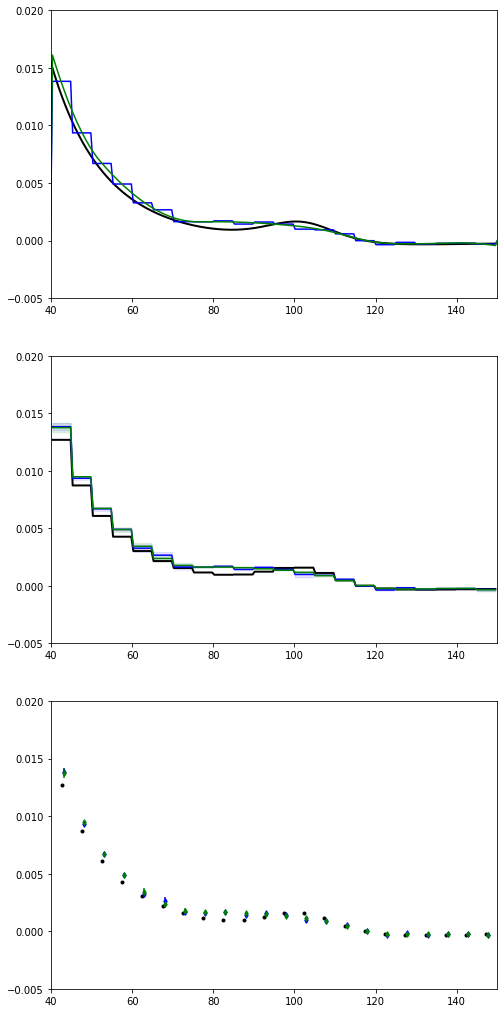

In [23]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
#seed_sets = [range(0,4), range(4,8)]
seed_sets = [range(0,50), range(50,100)]
result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)


#projs = ['tophat', 'quadratic_n10']
projs = ['tophat_n22', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)
#rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

r_true, xi_true, _ = np.load('{}/cf_lin_true{}.npy'.format(cat_dir, cat_tag), allow_pickle=True)
r_true_binned, xi_true_binned, r_true_avg, xi_true_avg = bin_cf_single(r_true, xi_true, rbins)

plt.figure()
fig, ax = plt.subplots(3, 1, figsize=(8,18))

ax[0].plot(r_true, xi_true, color='black', lw=2)
ax[1].plot(r_true_binned, xi_true_binned, color='black', lw=2)
ax[2].scatter(r_true_avg, xi_true_avg, color='black', lw=2, s=4)

for proj in projs:

    offset = 0
    
    rs_set = []
    xis_set = []
    
    rs_set_binned = []
    xis_set_binned = []
    
    rs_set_avg = []
    xis_set_avg = []
    
    for seeds in seed_sets:
        print(proj)
        rs, xis, amps = load_cfs(result_dir, proj, seeds)
        rs_binned, xis_binned, rs_avg, xis_avg = bin_cfs(rs, xis, rbins)
        rs_mean, xis_mean, xis_std, xis_low, xis_high = get_mean_stats(rs, xis)
        rs_binned_mean, xis_binned_mean, xis_binned_std, xis_binned_low, xis_binned_high = get_mean_stats(rs_binned, xis_binned)
        rs_avg_mean, xis_avg_mean, xis_avg_std, _, _ = get_mean_stats(rs_avg, xis_avg)

        rs_set.append(rs_mean)
        xis_set.append(xis_mean)
        
        rs_set_binned.append(rs_binned_mean)
        xis_set_binned.append(xis_binned_mean)
    
        rs_set_avg.append(rs_avg_mean)
        xis_set_avg.append(xis_avg_mean)
        
    offset += 0.5
        
    rs_set_mean, xis_set_mean, xis_set_std, xis_set_low, xis_set_high = get_mean_stats(rs_set, xis_set)
    ax[0].plot(rs_set_mean, xis_set_mean, color=utils.get_color(proj))
    
    rs_set_binned_mean, xis_set_binned_mean, xis_set_binned_std, \
        xis_set_binned_low, xis_set_binned_high = get_mean_stats(rs_set_binned, xis_set_binned)
    ax[1].plot(rs_set_binned_mean, xis_set_binned_mean, color=utils.get_color(proj))
    ax[1].fill_between(rs_set_binned_mean, xis_set_binned_low, xis_set_binned_high, color=utils.get_color(proj), alpha=0.1)
    
    rs_set_avg_mean, xis_set_avg_mean, xis_set_avg_std, \
        xis_set_avg_low, xis_set_avg_high = get_mean_stats(rs_set_avg, xis_set_avg)
    ax[2].errorbar(rs_set_avg_mean+offset, xis_set_avg_mean, yerr=xis_set_avg_std, 
                   color=utils.get_color(proj), marker='d', markersize=4, ls='None')



for i in range(len(ax)):
    ax[i].set_xlim(rmin, rmax)
    ax[i].set_ylim(-0.005, 0.02)

In [24]:
def get_amps(projs, cat_dir, cat_tag, result_dir, rbins, seeds):

    rs_mean = [None]*len(projs)
    xis_mean = [None]*len(projs)
    rs_binned_mean = [None]*len(projs)
    xis_binned_mean = [None]*len(projs)    
    rs_avg_mean = [None]*len(projs)
    xis_avg_mean = [None]*len(projs)

    labels = [None]*len(projs)
    colors = [None]*len(projs)

    error_regions = []
    error_regions_binned = []
    error_regions_avg = []

    for i in range(len(projs)):
        proj = projs[i]
        print(proj)
        
        rs, xis, amps = load_cfs(result_dir, proj, seeds)
        
        amps_all.append(amps)
    
    return amps_all

(100, 44)
(100, 11)


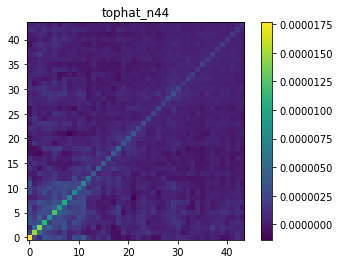

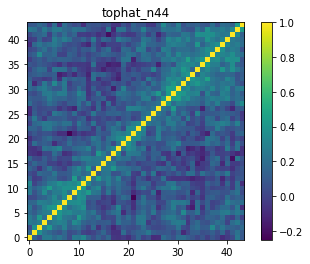

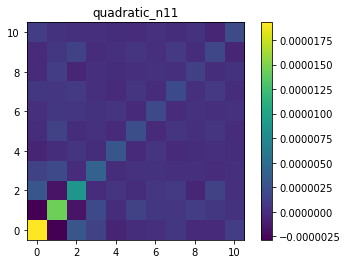

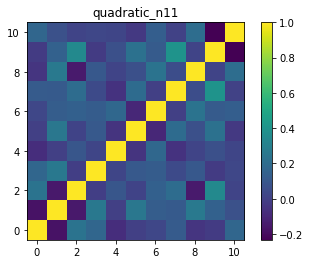

In [25]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

projs = ['tophat_n44', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)

for proj in projs:
    rs, xis, amps = load_cfs(result_dir, proj, seeds)
    print(amps.shape)
    cov = covariance(amps)
    red = reduced_covariance(cov)
    inv = inverse_covariance(cov, N)

    plt.figure()
    plt.title(proj)
    plt.imshow(cov, origin='lower')
    plt.colorbar()

    plt.figure()
    plt.title(proj)
    plt.imshow(red, origin='lower')
    plt.colorbar()

    #plt.figure()
    #plt.imshow(inv, origin='lower')
    #plt.colorbar()

(100, 44)
(100, 44)
[ 1.70634149e-02  1.12404819e-02  1.16995956e-02  9.25336732e-03
  7.86254566e-03  1.09614747e-02  1.15402988e-02  7.92011238e-03
  8.75651747e-03  4.17252424e-03  5.83507247e-03  5.44598345e-03
  2.87805531e-03 -1.24745951e-03  1.08845759e-03  8.98805077e-04
  3.77336599e-03  2.21014189e-03  1.55026235e-03  1.65636110e-03
  4.75889632e-04  1.98067968e-03  2.09909114e-03  2.07605633e-03
  1.38489116e-03  1.13262810e-03  4.19466717e-04  2.25551507e-03
 -2.50267546e-04  1.15030076e-03  1.34860509e-03 -1.09302776e-03
 -2.93421565e-03 -4.51923386e-03 -2.74472641e-04 -2.42385194e-03
 -1.80071510e-03  6.86423433e-04 -7.41391781e-04 -1.81764915e-03
  1.28392880e-04 -6.56504275e-04 -2.41966182e-05  7.54684662e-05]
(100, 11)
(100, 11)
[ 1.67429492e-02  8.73639202e-03  1.10784722e-02  7.28150596e-04
  2.39049729e-03  1.09207623e-03  2.22534319e-03 -2.16781006e-03
 -1.48796305e-03  6.66866682e-05 -2.84700703e-04]


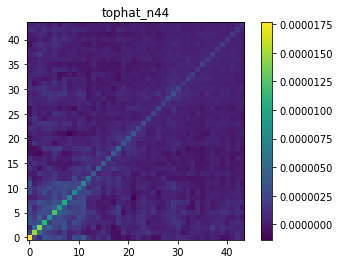

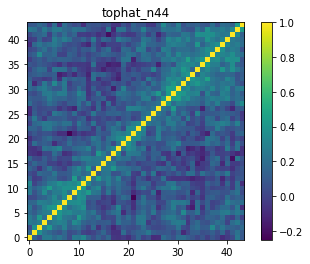

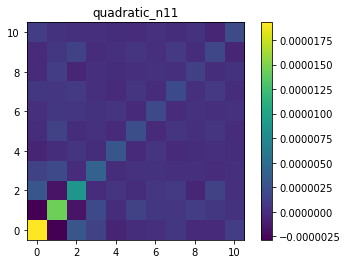

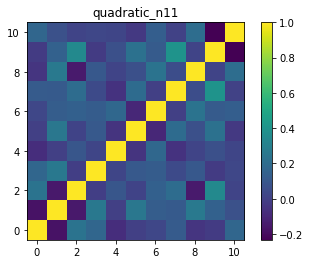

In [26]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

projs = ['tophat_n44', 'quadratic_n11']

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)

for proj in projs:
    rs, xis, amps = load_cfs(result_dir, proj, seeds)
    print(amps.shape)
    #cov = covariance(amps)
    print(amps.shape)
    print(amps[0])
    cov = np.cov(amps, rowvar=False)
    red = reduced_covariance(cov)
    #inv = inverse_covariance(cov, N)

    plt.figure()
    plt.title(proj)
    plt.imshow(cov, origin='lower')
    plt.colorbar()

    plt.figure()
    plt.title(proj)
    plt.imshow(red, origin='lower')
    plt.colorbar()

    #plt.figure()
    #plt.imshow(inv, origin='lower')
    #plt.colorbar()

In [27]:
def reduced_covariance_from_amps(amps):
    cov = covariance(amps)
    red = reduced_covariance(cov)
    return red

In [28]:
def jackknife_variance(sets, stat_func):
    Ns = len(sets)
    vals = []
    for i in range(Ns):
        val = stat_func(sets[i])
        vals.append(val)
    mean = np.mean(vals, axis=0)
    summation = np.sum((vals-mean)**2, axis=0)
    variance = float(Ns-1.)/float(Ns) * summation
    return variance

In [33]:
def reduced_covariance_cuts(projs, cat_dir, cat_tag, result_dir, rbins, cutat=105):
    plt.figure(figsize=(8,6))
    for proj in projs:
        rs, xis, amps = load_cfs(result_dir, proj, seeds)

        data = np.array(amps)
        sets = jackknife_sample(data)
        #estimate, bias, stderr, conf_interval = jackknife_stats(data, reduced_covariance_from_amps, 0.95)
        var = jackknife_variance(sets, reduced_covariance_from_amps)

        red = reduced_covariance_from_amps(amps)

        bincut = np.digitize(cutat, rbins)
        var_cut = var[:,bincut]
        red_cut = red[:,bincut]
        plt.errorbar(rbins_avg, red_cut, yerr=np.sqrt(var_cut), color=utils.get_color(proj),lw=0.5)
    plt.xlabel(r'r (Mpc h$^{-1}$)')

Jackknifing
Jackknifed
Jackknifing
Jackknifed


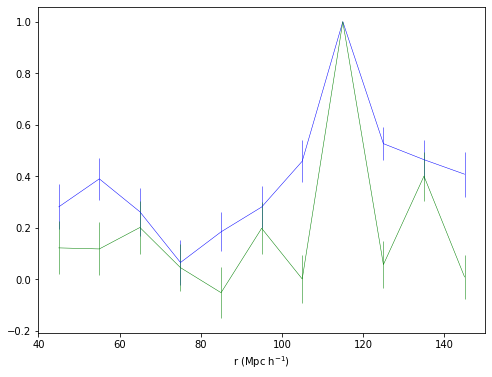

In [34]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

rmin = 40
rmax = 150
nbins = 11
rbins = np.linspace(rmin, rmax, nbins+1)
rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

#mps_all = np.empty((N, nbins))
projs = ['tophat_n11', 'quadratic_n11']

reduced_covariance_cuts(projs, cat_dir, cat_tag, result_dir, rbins)

Jackknifing
Jackknifed
Jackknifing
Jackknifed


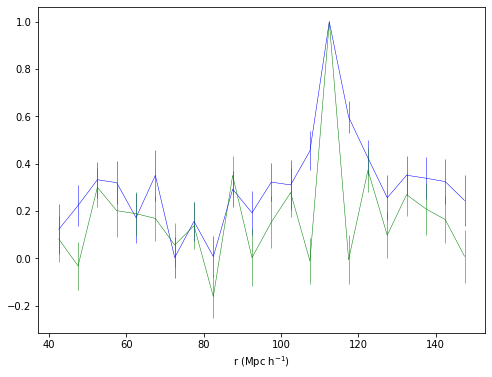

In [35]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

rmin = 40
rmax = 150
nbins = 22
rbins = np.linspace(rmin, rmax, nbins+1)
rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

#mps_all = np.empty((N, nbins))
projs = ['tophat_n22', 'quadratic_n22']

reduced_covariance_cuts(projs, cat_dir, cat_tag, result_dir, rbins)

Jackknifing
Jackknifed


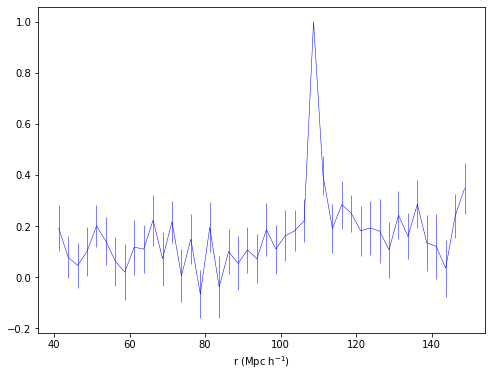

In [36]:
boxsize = 750
nbar_str = '1e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)
N = 100
seeds = range(N)
seed_sets = [range(0,25), range(25,50), range(50,75), range(75,100)]

result_dir = '../results/results_lognormal{}'.format(cat_tag)
cat_dir = '../catalogs/cats_lognormal{}'.format(cat_tag)

rmin = 40
rmax = 150
nbins = 44
rbins = np.linspace(rmin, rmax, nbins+1)
rbins_avg = 0.5*(rbins[1:]+rbins[:-1])

#mps_all = np.empty((N, nbins))
projs = ['tophat_n44']

reduced_covariance_cuts(projs, cat_dir, cat_tag, result_dir, rbins)